Linear Models
==
Linear models are widely used to help price securities and perform optimal portfolio allocation, among other useful things. 

One of the significance of linearity in financial modelling is its assurance that a problem terminates at a global optimal solution.

Modules such as the **SciPy** and **NumPy** packages contain a variety of linear regression functions for data scientists to work with.

In traditional portfolio management, the allocation of assets fllows a linear pattern, and investors have individual styles of investing. We can state the problem of portfolio allocation into a system of linear equations, containning either equalities or inequalities. These linear systems can then be represented in a matrix form as $Ax=B$, where $A$ is the known coefficients, $B$ is the observed result, and $x$ is the vector of values to find out. More often, $x$ contains the optimal security weights to maximize the agent's utility. Using matrix algebra, we can efficiently solve for $x$ using either direct or indirect methods.

# 2. Linear Optimization

Linear optimization focuses on minimizing or maximizing the value of the objective function. The examples are maximizing returns and minimizing volatility. These objectives are usually governed by certain regulations, such as no short-selling rule, limits on the number of securities to be invested, and so on.

A number of packages provide optimization methods. The following example makes use of **PuLP**, an open source linear programming modeller.

## Example - Linear optimization problem
Suppose that we are interested in investing in two securities, $x$ and $y$. We would like to find out the actual number of units to invest for every 3 units of security $x$ and 2 units of security $y$, such that the total number of units invested is maximized, where possible. However, there are certain constraints on our investment strategy:
- For every 2 units of security $x$ invested and 1 unit of security $y$ invested, the total volume must not exceed 100.
- For every unit of security $x$ and $y$ invested, the total volume must not exceed 80.
- The total volume allowed to invest in security $x$ must not exceed 40.
- Short selling is not allowed for both the securities.

The maximization problem can be mathematically represented as follows:
$$ \max: f(x,y) = 3x+2y $$
Subject to:
$$ 2x+y<=100 $$
$$ x+y<=80 $$
$$ x<=40 $$
$$ x>=0, y>=0 $$

In [7]:
import pulp

# Define input variables
x = pulp.LpVariable("x", lowBound=0)
y = pulp.LpVariable("y", lowBound=0)

# Formulate the Linear Problem
problem = pulp.LpProblem("Example - Linear Optimization", pulp.LpMaximize)
problem += 3*x + 2*y, "The objective function"
problem += 2*x + y <= 100, "1st constraint"
problem += x + y <= 80, "2nd constraint"
problem += x <= 40, "3nd constraint"

# Solve the problem (linear optimziation)
problem.solve()

#print problem.variables

# Show optimization results
results = problem.variables()
print("Maximization Results:")
for x in results:
    print(x.name, "=", x.varValue)

print("Objective function's value:", problem.objective.value())

Maximization Results:
x = 20.0
y = 60.0
Objective function's value: 180.0


# Integer Programming

Linear integer programming problem restricts all variables as integers. It is frequently used in operational research to model real-world working problems. 

## Example of an integer programming model with binary conditions

Suppose we must go for 150 contracts in a particular over-the-counter exotic security from three dealers. 
- Dealer $X$ quoted \$500 per contract plus handling fees of \$4,000, regardless of the number of contracts sold. 
- Dealer $Y$ charges \$350 per contract plus a transaction fee of \$2,000.
- Dealer $Z$ charges \$450 per contract plus a fee of \$6,000.
Dearler $X$ will sell at most 100 contracts, dealer $Y$ at most 90, and dealer $Z$ at most 70. 
The minimum transaction volume from any dealer is 30 contracts.
How should we minimize the cost of purchasing 150 contracts?


In [8]:
import pulp

dealers = ["X", "Y", "Z"] # This is the key to use dictionaries

variable_costs = {"X":500,
                  "Y":350,
                  "Z":450}

fixed_costs = {"X":4000,
               "Y":2000,
               "Z":6000}

# Define Input Variables
quantities = pulp.LpVariable.dicts("quantity", 
                                   dealers, 
                                   lowBound=0, 
                                   cat=pulp.LpInteger)
    # quantities are PULP varaibles of intergers

is_orders = pulp.LpVariable.dicts("orders",
                                  dealers,
                                  cat=pulp.LpBinary)
    # is_orders are PULP varaibles of binary indicators



**Incorrect solution**

The minimization problem can be mathematically represented as follows:
$$ \min: costs = \sum_{i=x}^{z} IsOrder_i(variable cost_i \cdot quantity_i + fixed costs_i) $$
Subject to:
$$ 30<=quantity_x<=100 $$
$$ 30<=quantity_y<=90 $$
$$ 30<=quantity_z<=70 $$
$$ \sum_{i=x}^{z} quantity_i = 150 $$

In [9]:
# Initialize the model with constraints
# model = pulp.LpProblem("A Cost Minimization Problem", pulp.LpMinimize)
# model += sum([(variable_costs[i]*quantities[i] + 
#              fixed_costs[i])*is_orders[i] for i in dealers]), "Objective function"
# model += 30 <= quantities["X"] <= 100, "Boundary of total volume of X"
# model += 30 <= quantities["Y"] <= 90, "Boundary of total volume of Y"
# model += 30 <= quantities["Z"] <= 70, "Boundary of total volume of Z"
# model += sum([quantities[i] for i in dealers]) == 150, "Total contracts required"

# model.solve()


**Correct solution**

The minimization problem can be mathematically represented as follows:
$$ \min: costs = \sum_{i=x}^{z} [(variable cost_i \cdot quantity_i + IsOrder_i \cdot fixed costs_i)] $$
Subject to:
$$ IsOrder_x \cdot 30<=quantity_x<=IsOrder_x \cdot 100 $$
$$ IsOrder_y \cdot 30<=quantity_y<=IsOrder_y \cdot 90 $$
$$ IsOrder_z \cdot 30<=quantity_z<=IsOrder_z \cdot 70 $$
$$ \sum_{i=x}^{i=z} quantity_i = 150 $$

In [10]:
# Initialize the model with constraints
model = pulp.LpProblem("A cost minimization problem", pulp.LpMinimize)
model += sum(variable_costs[i]*quantities[i] + is_orders[i]*fixed_costs[i] for i in dealers), \
        "Objective function"
model += is_orders["X"]*30 <= quantities["X"] <= is_orders["X"]*100, "Boundary of dealer X"
model += is_orders["Y"]*30 <= quantities["Y"] <= is_orders["Y"]*90, "Boundary of dealer Y"
model += is_orders["Z"]*30 <= quantities["Z"] <= is_orders["Z"]*70, "Boundary of dealer Z"
model += sum([quantities[i] for i in dealers])==150, "Total contracts required"

model.solve()

print("Minimization Results:")
for variable in model.variables():
    print(variable.name, "=", variable.varValue)
    
print("Total costs =", model.objective.value())

Minimization Results:
orders_X = 0.0
orders_Y = 1.0
orders_Z = 1.0
quantity_X = 0.0
quantity_Y = 90.0
quantity_Z = 60.0
Total costs = 66500.0


# Solve a System of Linear Equations using Matrices


## Example

Solve the following three equations:
$$ 2a + b + c = 4 $$
$$ a + 3b + 2c = 5 $$
$$ a = 6 $$

With all of the coefficients visible, the equations are as follows:
$$ 2a + 1b + 1c = 4 $$
$$ 1a + 3b + 2c = 5 $$
$$ 1a + 0b + 0c = 6 $$

$$
A =
  \begin{bmatrix}
    2 & 1 & 1 \\
    1 & 3 & 2 \\
    1 & 0 & 0
  \end{bmatrix}
$$

$$
X =
  \begin{bmatrix}
    a \\ b \\ c
  \end{bmatrix}
$$

$$
Y =
  \begin{bmatrix}
    4 \\ 5 \\ 6
  \end{bmatrix}  
$$

The linear equations can now be stated as follows:
$$ AX=Y $$

And the solutions can be found:
$$X = A^{-1}Y$$

Using the *NumPy* arrays, the $X$ matrix can be easily solved using linear algebra.

In [11]:
import numpy as np

A = np.array([[1, 2, 1], 
              [1, 3, 2],
              [1, 0, 0]])

Y = np.array([4, 5, 6])

print(np.linalg.solve(A, Y))


[ 6. -3.  4.]


# Multivariate OLS

Many Python packages such as **SciPy** come with several variants of regression functions. In particular, the **statsmodels** package is a complement to **SciPy** with descriptive statistics and estimation of statistical models. The official page for **statsmodels** is http://statsmodels.sourceforge.net/


## Simple Example - Perform OLS and view its summary

Let's assume that you have implemented an APT model with seven factors that return the values of $Y$. Consider the following set of data collected over 9 time periods, from $t1$ to $t9$. $X1$ to $X7$ are exogenous variables observed at each period. The regression problem is therefore defined as:
$$ Y = \beta_1X_{1}+\beta_2X_{2}+\beta_3X_{3}+\beta_4X_{4}+\beta_5X_{5}+\beta_6X_{6}+\beta_7X_{7}+\varepsilon $$

In [6]:
import numpy as np
import statsmodels.api as sm

# Generate some sample data
num_periods = 9
all_values = np.array([np.random.random(8) for i in range(num_periods)])

# Filter the data
y_values = all_values[:,0] # First column values as Y
x_values = all_values[:, 1:] # All other values as X


x_values = sm.add_constant(x_values, prepend=True) # Include the intercept

# Fit OLS to the data
model = sm.OLS(y_values, x_values) # you can change model parameters after initializaing the model
results = model.fit()  # estimate the model
print(results.summary()) # show model results

# Use the params functions to display the coefficient vector
results.params

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     2.879
Date:                Sun, 20 Mar 2016   Prob (F-statistic):              0.426
Time:                        10:58:09   Log-Likelihood:                 15.729
No. Observations:                   9   AIC:                            -15.46
Df Residuals:                       1   BIC:                            -13.88
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.4974      0.320      4.678      0.1

/usr/local/opt/anaconda/envs/nb/lib/python3.4/site-packages/scipy/stats/stats.py:1557: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


array([ 1.49736128, -0.12525588, -0.453542  , -0.40841679,  0.34299651,
       -0.43961593,  0.29633744, -0.99976095])

## Advanced Example

Let's consider TSLA and SPY. We would like to know how TSLA varies as a function of how SPY varies, so we will take the daily returns of each and regress them against each other.

Python's `statsmodels` library has a built-in linear fit function. Note that this will give a line of best fit; whether or not the relationship it shows is significant is for you to determine. The output will also have some statistics about the model, such as R-squared and the F value, which may help you quantify how good the fit actually is.

In [54]:
# Required libraries for Example 2
import numpy as np
from statsmodels import regression
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [51]:
# First define a function that performs linear regression and plots the results.
def linreg(X, Y):
    # Running the linear regression
    X_with_constant = sm.add_constant(X)
    model = regression.linear_model.OLS(Y, X_with_constant).fit()
    a = model.params[0]  # Intercept
    b = model.params[1]
    
    print(a, "b :", b)
    
    # Return summary of the regression and plots
    X2 = np.linspace(X.min(), X.max(), 100)
    Y_hat = a + np.dot(X2, b)
    plt.scatter(X, Y, alpha=0.3)  # Plot the raw data
    plt.plot(X2, Y_hat, 'r', alpha=0.9);  # Plot the fitted line
    plt.xlabel("X Value")
    plt.ylabel("Y Value")
    
    return model.summary()

Now we'll get pricing data on TSLA and SPY and perform a regression

In [46]:
from pandas_datareader import data, wb

start = '2014-01-01'
end = '2015-01-01'
asset = data.DataReader("TSLA", "yahoo", start=start, end=end)
benchmark = data.DataReader("SPY", "yahoo", start=start, end=end)

0.000917155373304 b : 1.95415415044


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     64.27
Date:                Sun, 20 Mar 2016   Prob (F-statistic):           4.23e-14
Time:                        11:30:18   Log-Likelihood:                 549.18
No. Observations:                 251   AIC:                            -1094.
Df Residuals:                     249   BIC:                            -1087.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0009      0.002      0.532      0.595        -0.002     0.004
x1             1.9542      0.244      8.017      0.000         1.474     2.434
==============================================================================
Omnibus:                       64.854   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              376.768
Skew:                           0.865   Prob(JB):                     1.53e-82
Kurtosis:                       8.748   Cond. No.                         142.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

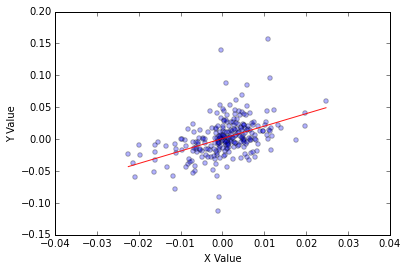

In [52]:
# We have to take the percent changes to get returns
# Get rid of the 1st (0th) element because it is a NAN
r_a = asset['Adj Close'].pct_change()[1:]
r_b = benchmark['Adj Close'].pct_change()[1:]


linreg(r_b.values, r_a.values)

Each point on the above graph represents a day, with the x-coordinate being the return of SPY, and the y-coordinate being the return of TSLA. As we can see, the line of best fit tells us that for every 1% increased return we see from the SPY, we should see an extra 1.92% from TSLA. This is expressed by the parameter $\beta$, which is 1.9271 as estimated. Of course, for decresed return we will also see about double the loss in TSLA, so we haven't gained anything, we are just more volatile.

## Linear Regression vs. Correlation

* Linear regression gives us a specific linear model, but is limited to cases of linear dependence.
* Correlation is general to linear and non-linear dependencies, but doesn't give us an actual model.
* Both are measures of covariance.
* Linear regression can give us relationship between Y and many independent variables by making X multidimensional.

## Knowing Parameters vs. Estimates

It is very important to keep in mind that all $\alpha$ and $\beta$ parameters estimated by linear regression are just that - estimates. You can never know the underlying true parameters unless you know the physical process producing the data. The paremeters you estimate today may not be the same as the same analysis done including tomorrow's data, and the underlying true parameters may be moving. As such it is very important when doing actual analysis to pay attention to the standard error of the parameter estimates.  One way to get a sense of how stable your paremeter estimates are is to estimates them using a rolling window of data and see how much variance there is in the estimates.


## Ordinary Least Squares

Regression works by optimizing the placement of the line of best fit (or plane in higher dimensions). It does so by defining how bad the fit is using an objective function. In ordinary least squares regression, a very common type and what we use here, the objective function is:

$$\sum_{i=1}^n (Y_i - a - bX_i)^2$$

That is, for each point on the line of best fit, compare it with the real point and take the square of the difference. This function will decrease as we get better paremeter estimates. Regression is a simple case of numerical optimzation that has a closed form solution and does not need any optimizer.

# Evaluating and reporting results

The regression model relies on several assumptions:
* The independent variable is not random.
* The variance of the error term is constant across observations. This is important for evaluating the goodness of the fit.
* The errors are not autocorrelated. The Durbin-Watson statistic detects this; if it is close to 2, there is no autocorrelation.
* The errors are normally distributed. If this does not hold, we cannot use some of the statistics, such as the F-test.

If we confirm that the necessary assumptions of the regression model are satisfied, we can safely use the statistics reported to analyze the fit. For example, the $R^2$ value tells us the fraction of the total variation of $Y$ that is explained by the model.

When making a prediction based on the model, it's useful to report not only a single value but a confidence interval. The linear regression reports 95% confidence intervals for the regression parameters, and we can visualize what this means using the `seaborn` library, which plots the regression line and highlights the 95% (by default) confidence interval for the regression line:

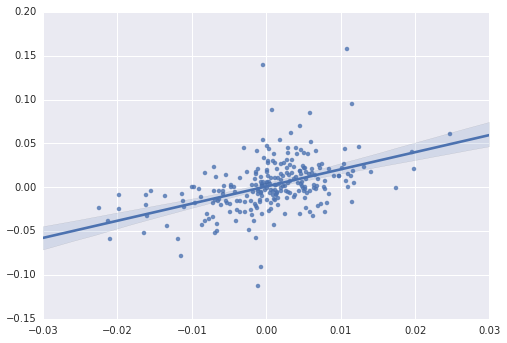

In [60]:
import seaborn

seaborn.regplot(r_b.values, r_a.values);

We can also find the standard error of estimate, which measures the standard deviation of the error term $\epsilon$, by getting the `scale` parameter of the model returned by the regression and taking its square root. The formula for standard error of estimate is
$$ s = \left( \frac{\sum_{i=1}^n \epsilon_i^2}{n-2} \right)^{1/2} $$

This is useful because the variance of the error in our prediction $\hat{Y}$ given the value $X$ is
$$ s_f^2 = s^2 \left( 1 + \frac{1}{n} + \frac{(X - \mu_X)^2}{(n-1)\sigma_X^2} \right) $$

where $\mu_X$ is the mean of our observations of $X$ and $\sigma_X$ is the standard deviation. Then the 95% confidence interval for the prediction is $\hat{Y} \pm t_cs_f$, where $t_c$ is the critical value of the t-statistic for $n$ samples and a desired 95% confidence.